<a href="https://colab.research.google.com/github/pongsapaks/Detection-depression/blob/main/Fusion_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

TensorFlow 2.15.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 0 GPU(s):


In [18]:
text_prediction = pd.read_csv("/content/drive/MyDrive/Final_DLP/Text_pred.csv")

audio_prediction = pd.read_csv("/content/drive/MyDrive/Final_DLP/Text_pred.csv")

Y_test = pd.read_csv("/content/drive/MyDrive/Final_DLP/y_true.csv")

In [ ]:
# Assuming you have predictions from both text and audio models
text_model_predictions = text_prediction.values  #convert to numpy array
audio_model_predictions = audio_prediction.values  #convert to numpy array

# Concatenate the predictions as features
combined_features = np.concatenate((text_model_predictions, audio_model_predictions), axis=1)
combined_features

In [ ]:
Y_true = Y_test.values  #convert to numpy array

# Define a simple perceptron model
model = Sequential()
model.add(Dense(1, input_dim=4, activation='sigmoid'))  # 4 input features (2 from text, 2 from audio)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(combined_features, Y_true, epochs=100, verbose=1)

# Make predictions using the combined features
final_predictions = model.predict(combined_features)

# Convert the final predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
final_binary_predictions = (final_predictions > 0.5).astype(int)

print("Final Binary Predictions:", final_binary_predictions.flatten())


In [34]:
from sklearn.metrics import accuracy_score,classification_report,  ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
accuracy_score(Y_true, final_binary_predictions)

0.6956521739130435

In [30]:
print(classification_report(Y_true, final_binary_predictions))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        32
           1       0.00      0.00      0.00        14

    accuracy                           0.70        46
   macro avg       0.35      0.50      0.41        46
weighted avg       0.48      0.70      0.57        46



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


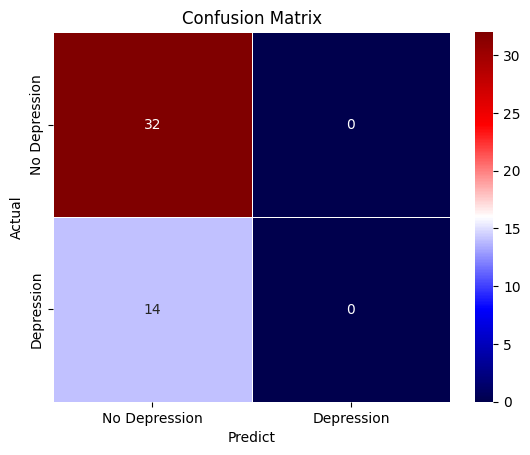

In [36]:
y_true_label = ['No Depression' , 'Depression']
y_pred_label = ['No Depression' , 'Depression']
cm = confusion_matrix(Y_true, final_binary_predictions)
ax = sns.heatmap(cm, annot = True, cmap = 'seismic',xticklabels = y_pred_label, yticklabels = y_true_label, linewidth=.5, )
ax.set(xlabel='Predict',ylabel='Actual')
plt.title('Confusion Matrix')
plt.show()